In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
# print(adult.metadata) 
  
# variable information 
# print(adult.variables) 

In [3]:
# Inspect the data
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
# Inspect the data
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [5]:
y = y.replace({"<=50K.": "<=50K", ">50K.": ">50K"})

In [6]:
y.nunique()

income    2
dtype: int64

In [7]:
# Check for missing values in the features
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [8]:
# Extract unique values for each categorical feature
categorical_features = [
    'workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'native-country'
]
# Get unique values for each feature
unique_values = {feature: X[feature].unique().tolist() for feature in categorical_features}

# Display the unique values
for feature, values in unique_values.items():
    print(f"{feature}: {values}")

workclass: ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', nan]
education: ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital-status: ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation: ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv', nan]
relationship: ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race: ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex: ['Male', 'Female']
native-country: ['United-States', 'Cuba', 'Jamaica', 'India'

In [9]:
# Calculate defaults
avg_fnlwgt = X['fnlwgt'].mean()
print(round(avg_fnlwgt,2))

189664.13


# **Data cleaning**

### Handling Missing Values and '?'

In [12]:
import numpy as np
# Replace "?" with NaN in the specified columns using .loc
X.loc[X['workclass'] == "?", 'workclass'] = np.nan
X.loc[X['occupation'] == "?", 'occupation'] = np.nan
X.loc[X['native-country'] == "?", 'native-country'] = np.nan

# Impute missing values with the most frequent value (mode) using .loc[]
X.loc[:, 'workclass'] = X['workclass'].fillna(X['workclass'].mode()[0])
X.loc[:, 'occupation'] = X['occupation'].fillna(X['occupation'].mode()[0])
X.loc[:, 'native-country'] = X['native-country'].fillna(X['native-country'].mode()[0])

In [13]:
# Standardize original categorical columns
X.loc[:, 'native-country'] = X['native-country'].str.lower()

In [14]:
# Check for missing values in the features
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### One-hot Encoding

In [16]:
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation',
                                          'relationship', 'race', 'sex', 'native-country'], drop_first=True)

### Ensuring Correct Data Types

In [18]:
X.loc[:, 'age'] = X['age'].astype(int)
X.loc[:, 'fnlwgt'] = X['fnlwgt'].astype(int)
X.loc[:, 'capital-gain'] = X['capital-gain'].astype(int)
X.loc[:, 'capital-loss'] = X['capital-loss'].astype(int)
X.loc[:, 'hours-per-week'] = X['hours-per-week'].astype(int)

In [19]:
# Check the data types of the columns
X.dtypes

age                               int64
fnlwgt                            int64
education-num                     int64
capital-gain                      int64
capital-loss                      int64
                                  ...  
native-country_thailand            bool
native-country_trinadad&tobago     bool
native-country_united-states       bool
native-country_vietnam             bool
native-country_yugoslavia          bool
Length: 97, dtype: object

### Feature Engineering

In [21]:
# Create a new feature 'net-capital-gain'
X['net-capital-gain'] = X['capital-gain'] - X['capital-loss']

# Drop the original 'capital-gain' and 'capital-loss' columns if no longer needed
X.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [22]:
# Drop `education-num` since it seems redundant
X.drop('education-num', axis=1, inplace=True)

## **Handling Outliers**

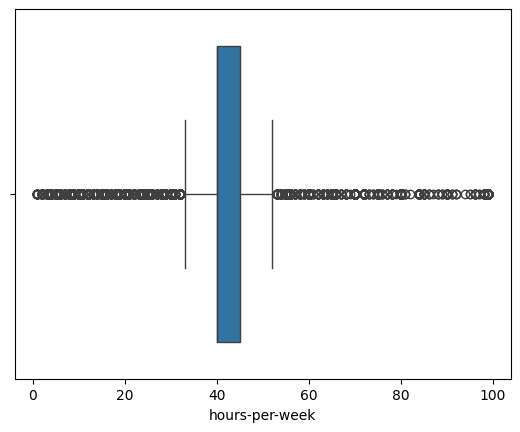

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for outliers in 'hours-per-week'
sns.boxplot(x=X['hours-per-week'])
# Remove outliers in 'hours-per-week'
X = X[X['hours-per-week'] <= 80]

plt.show()

In [25]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where values are outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Columns to check for outliers (adjust as needed)
columns_to_check = ['age', 'fnlwgt', 'net-capital-gain']

# Apply the function to remove outliers
X_cleaned = remove_outliers_iqr(X, columns_to_check)

# Display the cleaned dataframe
X_cleaned.head()

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia,net-capital-gain
1,50,83311,13,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
2,38,215646,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,53,234721,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
4,28,338409,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
5,37,284582,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [26]:
X_cleaned['hours-per-week'].max()

80

In [27]:
print(X_cleaned.shape)
print(y.shape)

(40801, 95)
(48842, 1)


In [28]:
# Assuming y is still a pandas Series, you can check:
y = y.loc[X_cleaned.index]

In [29]:
print(X_cleaned.shape)
print(y.shape)

(40801, 95)
(40801, 1)


### Splitting the Data

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32640, 95), (8161, 95), (32640, 1), (8161, 1))

## **Random Forest** Accuracy= 85%

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
# Train the model with 1D target array (using squeeze)
rf_model.fit(X_train, y_train.squeeze())

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [36]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Get a more detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8465
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6649
        >50K       0.62      0.45      0.52      1512

    accuracy                           0.85      8161
   macro avg       0.75      0.69      0.71      8161
weighted avg       0.83      0.85      0.84      8161

Confusion Matrix:
[[6226  423]
 [ 830  682]]


## **Neural Network Classification**  Accuracy= 83%

In [38]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [39]:
# Preprocess the Target Variable
y_train_nn = pd.get_dummies(y_train).values  # One-hot encoding
y_test_nn = pd.get_dummies(y_test).values    # For evaluation

In [40]:
# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Define NN model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='sigmoid')  # Two neurons for binary output with softmax
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
history = nn_model.fit(X_train_scaled, y_train_nn, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.8305 - loss: 0.3760 - val_accuracy: 0.8514 - val_loss: 0.3146
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8494 - loss: 0.3169 - val_accuracy: 0.8430 - val_loss: 0.3269
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8551 - loss: 0.3058 - val_accuracy: 0.8559 - val_loss: 0.3095
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8585 - loss: 0.3006 - val_accuracy: 0.8566 - val_loss: 0.3106
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8612 - loss: 0.2972 - val_accuracy: 0.8555 - val_loss: 0.3094
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8648 - loss: 0.2875 - val_accuracy: 0.8554 - val_loss: 0.3100
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8661 - loss: 0.2896 - val_accuracy: 0.8557 - val_loss: 0.3103
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8638 - loss: 0.2910 - 

In [44]:
# Evaluate the Model
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test_nn)
print(f'Test accuracy: {test_accuracy:.4f}')

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8488 - loss: 0.3407
Test accuracy: 0.8450


In [45]:
# Convert y_test to integer labels to match the format of y_pred_classes
y_test_int = y_test.replace({"<=50K": 0, ">50K": 1}).astype(int)

# Convert neural network predictions to binary classes
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_classes = (y_pred_nn[:, 1] > 0.5).astype(int)  # Convert probabilities to binary predictions

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


/var/folders/kt/21f5gvq515b0l09rm2csqv100000gn/T/ipykernel_55561/1384599761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_int = y_test.replace({"<=50K": 0, ">50K": 1}).astype(int)


In [46]:
# Evaluation
# Import the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix using integer labels
print("Classification Report:")
print(classification_report(y_test_int, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_int, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6649
           1       0.57      0.56      0.57      1512

    accuracy                           0.84      8161
   macro avg       0.74      0.73      0.73      8161
weighted avg       0.84      0.84      0.84      8161


Confusion Matrix:
[[6015  634]
 [ 665  847]]


## **XGBoost** Accuracy= 86%

In [48]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    max_depth=6,            # Maximum tree depth for base learners
    learning_rate=0.1,      # Step size shrinkage used to prevent overfitting
    eval_metric='logloss',   # Evaluation metric for the validation dataset
    random_state=42
)
y_train_int = y_train.replace({"<=50K": 0, ">50K": 1}).astype(int).values

/var/folders/kt/21f5gvq515b0l09rm2csqv100000gn/T/ipykernel_55561/2758752803.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_int = y_train.replace({"<=50K": 0, ">50K": 1}).astype(int).values


In [49]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train_int)  # y_train_int is the integer-encoded y_train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [50]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [51]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test_int, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.4f}')
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_int, y_pred_xgb))

Accuracy: 0.8585

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6649
           1       0.67      0.46      0.55      1512

    accuracy                           0.86      8161
   macro avg       0.78      0.71      0.73      8161
weighted avg       0.85      0.86      0.85      8161


Confusion Matrix:
[[6308  341]
 [ 814  698]]


In [59]:
# Save models
import joblib

# Save Random Forest model
joblib.dump(rf_model, 'Resources/Models/random_forest_model.pkl')

# Save Neural Network model
nn_model.save('Resources/Models/neural_network_model.keras')

# Save XGBoost model
joblib.dump(xgb_model, 'Resources/Models/xgboost_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [56]:
# Save scaler
joblib.dump(scaler, 'Resources/Scaler/scaler.pkl')

# Save training columns
import json
with open('Resources/Columns/training_columns.json', 'w') as f:
    json.dump(X_train.columns.tolist(), f)